In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración visual
plt.style.use('ggplot')

# 1. Carga del archivo de Compras
try:
    df_purchases = pd.read_csv("../data/InvoicePurchases12312016.csv")
    print("✅ Archivo InvoicePurchases cargado con éxito.")
except FileNotFoundError:
    print("❌ Error: No encuentro el archivo. Chequeá la ruta.")

# 2. Vistazo general
print(f"\nDimensiones: {df_purchases.shape} (Filas, Columnas)")
print("\n--- Primeras 3 filas ---")
display(df_purchases.head(3))

print("\n--- Tipos de datos y Nulos ---")
df_purchases.info()

✅ Archivo InvoicePurchases cargado con éxito.

Dimensiones: (5543, 10) (Filas, Columnas)

--- Primeras 3 filas ---


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN



--- Tipos de datos y Nulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [2]:
# 1. Totales Gastados
total_gastado = df_purchases['Dollars'].sum()
total_flete = df_purchases['Freight'].sum()

print(f"💸 TOTAL GASTADO EN COMPRAS: ${total_gastado:,.2f}")
print(f"🚚 TOTAL GASTADO EN FLETES: ${total_flete:,.2f}")

# 2. Top 5 Proveedores (Vendors) - ¿A quién le damos más plata?
top_vendors = df_purchases.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(5)

print("\n--- Top 5 Proveedores que más nos facturan ---")
display(top_vendors)

💸 TOTAL GASTADO EN COMPRAS: $321,900,765.53
🚚 TOTAL GASTADO EN FLETES: $1,640,474.69

--- Top 5 Proveedores que más nos facturan ---


VendorName
DIAGEO NORTH AMERICA INC       50959796.85
MARTIGNETTI COMPANIES          27821473.91
JIM BEAM BRANDS COMPANY        24203151.05
PERNOD RICARD USA              24124091.56
BACARDI USA INC                17624378.72
Name: Dollars, dtype: float64

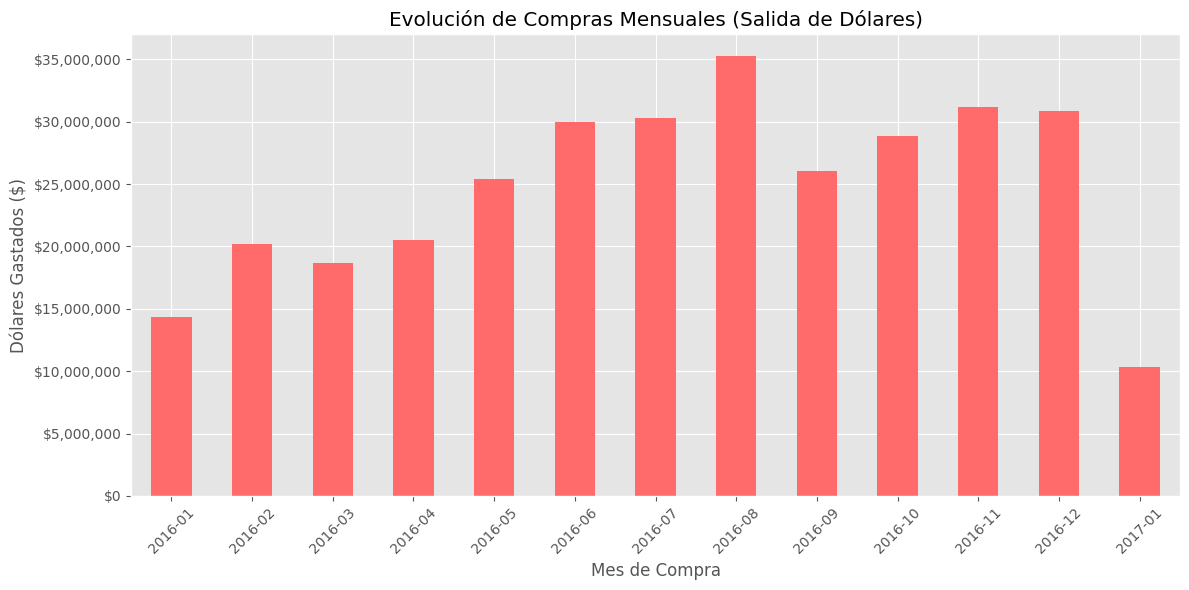

🚨 El mes donde más se compró fue 2016-08 con un gasto de $35,241,932.46


In [3]:
# 1. Convertir la fecha a formato DateTime de Pandas
columna_fecha = 'InvoiceDate' # Cambiá esto si tu columna se llama PODate o similar
df_purchases[columna_fecha] = pd.to_datetime(df_purchases[columna_fecha])

# 2. Agrupar el gasto en Dólares por Mes
compras_por_mes = df_purchases.groupby(df_purchases[columna_fecha].dt.to_period('M'))['Dollars'].sum()

# 3. Graficar
plt.figure(figsize=(12, 6))
# Usamos el color rojo porque representa "salida de dinero"
compras_por_mes.plot(kind='bar', color='#ff6b6b')

plt.title('Evolución de Compras Mensuales (Salida de Dólares)')
plt.ylabel('Dólares Gastados ($)')
plt.xlabel('Mes de Compra')

# Formatear el eje Y a dólares
formatter = FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Extra: Mes con mayor gasto
mes_pico = compras_por_mes.idxmax()
gasto_pico = compras_por_mes.max()
print(f"🚨 El mes donde más se compró fue {mes_pico} con un gasto de ${gasto_pico:,.2f}")